## Exploratory Data Analysis of the Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


testing out

In [3]:
df_school = pd.read_csv('../dataset/dataset.csv')

In [4]:
df_school.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:


column_mapping = {
    'Marital status': 'MaritalStat',
    'Application mode': 'AppMode',
    'Application order': 'AppOrder',
    'Course': 'Course',
    'Daytime/evening attendance': 'DayEveningAtt',
    'Previous qualification': 'PrevQual',
    'Nacionality': 'Nationality',  
    "Mother's qualification": 'MotherQual',
    "Father's qualification": 'FatherQual',
    "Mother's occupation": 'MotherOcc',
    "Father's occupation": 'FatherOcc',
    'Displaced': 'Displaced',
    'Educational special needs': 'EduNeeds',
    'Debtor': 'Debtor',
    'Tuition fees up to date': 'FeesUpdated',
    'Gender': 'Gender',
    'Scholarship holder': 'Scholarship',
    'Age at enrollment': 'AgeEnroll',
    'International': 'International',
    'Curricular units 1st sem (credited)': 'CU1Credited',
    'Curricular units 1st sem (enrolled)': 'CU1Enrolled',
    'Curricular units 1st sem (evaluations)': 'CU1Evaluations',
    'Curricular units 1st sem (approved)': 'CU1Approved',
    'Curricular units 1st sem (grade)': 'CU1Grade',
    'Curricular units 1st sem (without evaluations)': 'CU1NoEvals',
    'Curricular units 2nd sem (credited)': 'CU2Credited',
    'Curricular units 2nd sem (enrolled)': 'CU2Enrolled',
    'Curricular units 2nd sem (evaluations)': 'CU2Evaluations',
    'Curricular units 2nd sem (approved)': 'CU2Approved',
    'Curricular units 2nd sem (grade)': 'CU2Grade',
    'Curricular units 2nd sem (without evaluations)': 'CU2NoEvals',
    'Unemployment rate': 'UnempRate',
    'Inflation rate': 'InflationRate',
    'GDP': 'GDP',
    'Target': 'Target'
}



df_school.rename(columns=column_mapping, inplace=True)


In [6]:
# Gender replacement
gender_replace = {
    1: 'male',
    0: 'female'
}
df_school['Gender'] = df_school['Gender'].replace(gender_replace)

# Nationality replacement
nationality_replace = {
    1: 'Portuguese', 2: 'German', 3: 'Spanish', 4: 'Italian', 5: 'Dutch', 6: 'English',
    7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 10: 'Guinean', 11: 'Mozambican',
    12: 'Santomean', 13: 'Turkish', 14: 'Brazilian', 15: 'Romanian', 16: 'Moldova (Republic of)',
    17: 'Mexican', 18: 'Ukrainian', 19: 'Russian', 20: 'Cuban', 21: 'Colombian'
}
df_school['Nationality'] = df_school['Nationality'].replace(nationality_replace)

### Count of Target

In [7]:

plt.figure(figsize=(10, 6))
class_counts = pd.DataFrame(df_school['Target'].value_counts())
class_counts.reset_index(inplace=True)
class_counts
plt.bar(class_counts['index'], class_counts['Target'], width = 0.50)
plt.title("Target Count")
plt.tight_layout()
plt.show()

KeyError: 'index'

<Figure size 720x432 with 0 Axes>

### Unemployment Rate and Target, Gender

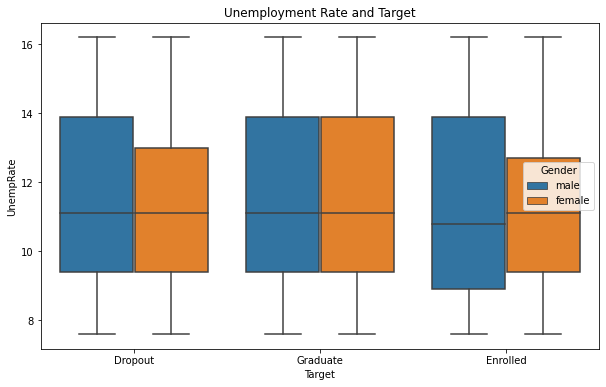

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='UnempRate',hue='Gender', data=df_school)
plt.title('Unemployment Rate and Target')
plt.show()

### Distribution of students by gender, nationality, and age. 

In [9]:
# Function to annotate the bars with counts
def annotate_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                '{:.0f}'.format(height),
                ha='center', va='bottom')



In [10]:
df_school['Gender'].unique()

array(['male', 'female'], dtype=object)

In [11]:
df_school['Nationality'].unique()

array(['Portuguese', 'Romanian', 'Spanish', 'Brazilian', 'Santomean',
       'Ukrainian', 'Dutch', 'Mozambican', 'Angolan', 'Mexican',
       'Italian', 'Cape Verdean', 'Turkish', 'Moldova (Republic of)',
       'Guinean', 'Colombian', 'German', 'Cuban', 'Russian', 'English',
       'Lithuanian'], dtype=object)

In [12]:
df_school['Nationality'].unique()

array(['Portuguese', 'Romanian', 'Spanish', 'Brazilian', 'Santomean',
       'Ukrainian', 'Dutch', 'Mozambican', 'Angolan', 'Mexican',
       'Italian', 'Cape Verdean', 'Turkish', 'Moldova (Republic of)',
       'Guinean', 'Colombian', 'German', 'Cuban', 'Russian', 'English',
       'Lithuanian'], dtype=object)

### Map countries to continents

In [13]:
country_to_continent = {
    'Portuguese': 'Europe', 
    'German': 'Europe', 
    'Spanish': 'Europe',
    'Italian': 'Europe', 
    'Dutch': 'Europe',
    'English': 'Europe', 
    'Lithuanian': 'Europe', 
    'Angolan': 'Africa', 
    'Cape Verdean': 'Africa',
    'Guinean': 'Africa', 
    'Mozambican': 'Africa',
    'Santomean': 'Africa',
    'Turkish': 'Africa',
    'Brazilian': 'America',
    'Romanian': 'Europe', 
    'Moldova (Republic of)': 'Europe',
    'Mexican': 'America',
    'Ukrainian': 'Europe',
    'Russian': 'Europe',
    'Cuban': 'America',
    'Colombian': 'America'
}

df_school['Continent'] = df_school['Nationality'].map(country_to_continent)


In [14]:
# df_school['Nationality'].value_counts()

In [15]:
df_school['Continent'].value_counts()


Continent
Europe     4345
America      42
Africa       37
Name: count, dtype: int64

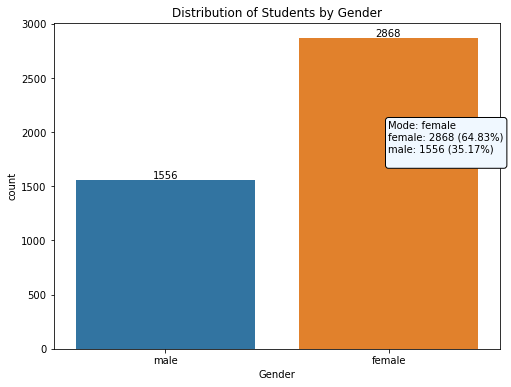

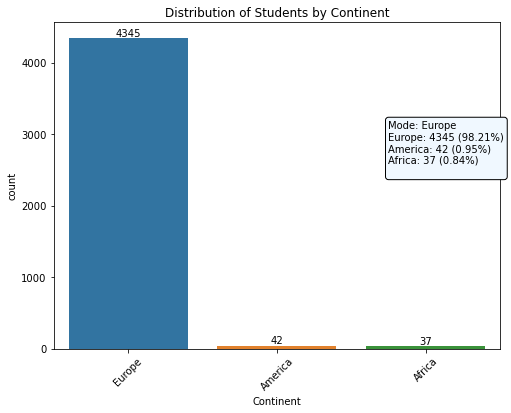

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

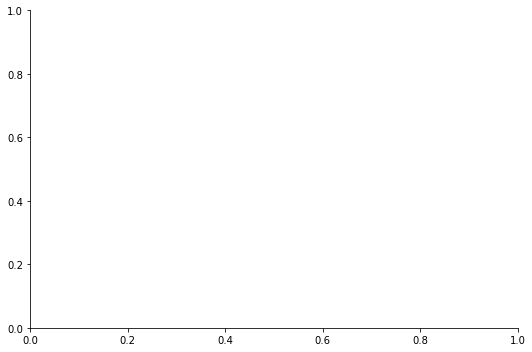

In [16]:
def annotate_categorical_stats(ax, data, ypos=0.7):
    mode = data.mode().iloc[0]  # Taking the first mode in case of multiple modes
    counts = data.value_counts().to_dict()
    total = len(data)
    
    stats_str = f'Mode: {mode}\n'
    
    for category, count in counts.items():
        percentage = 100 * count / total
        stats_str += f'{category}: {count} ({percentage:.2f}%)\n'
    
    ax.text(0.75, ypos, stats_str, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue'))

# Gender Distribution
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(x='Gender', data=df_school)
annotate_counts(ax1)
annotate_categorical_stats(ax1, df_school['Gender'])
plt.title('Distribution of Students by Gender')
plt.show()

# Nationality Distribution
plt.figure(figsize=(8, 6))
ax2 = sns.countplot(x='Continent', data=df_school)
annotate_counts(ax2)
annotate_categorical_stats(ax2, df_school['Continent'])
plt.title('Distribution of Students by Continent')
plt.xticks(rotation=45)
plt.show()

# Age at Enrollment Distribution
g = sns.displot(df_school['AgeEnroll'], kde=True, aspect=1.5)
g.ax.set_title('Distribution of Students by Age at Enrollment')
#annotate_stats(g.ax, df_school['Age at enrollment'])
plt.show()


In [ ]:
df_school['Target'].unique()

In [ ]:
# Filtering out students who have completed (either graduated or dropped out)
completed_students = df_school[df_school['Target'] != 'Enrolled']

# For male students
male_students = completed_students[completed_students['Gender'] == 'male']
male_dropouts = male_students[male_students['Target'] == 'Dropout']
male_dropout_rate = (len(male_dropouts) / len(male_students)) * 100 if len(male_students) > 0 else 0

# For female students
female_students = completed_students[completed_students['Gender'] == 'female']
female_dropouts = female_students[female_students['Target'] == 'Dropout']
female_dropout_rate = (len(female_dropouts) / len(female_students)) * 100 if len(female_students) > 0 else 0

print(f"Male Dropout Rate: {male_dropout_rate:.2f}%")
print(f"Female Dropout Rate: {female_dropout_rate:.2f}%")


- Differences between dropouts and graduates.

In [ ]:
# Gender vs Target (Dropout/Graduate)
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='Gender', hue='Target', data=df_school)
annotate_counts(ax1)
plt.title('Gender Distribution by Dropout/Graduate Status')
plt.show()



In [ ]:
# Define a function to print the relevant statistics
def print_statistics(data):
    Q1 = data.quantile(0.25)
    median = data.median()
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    whisker_top = min(data.max(), Q3 + 1.5 * IQR)
    whisker_bottom = max(data.min(), Q1 - 1.5 * IQR)

    print(f"Median: {median:.2f}")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR (Interquartile Range): {IQR:.2f}")
    print(f"Whisker Top: {whisker_top:.2f}")
    print(f"Whisker Bottom: {whisker_bottom:.2f}")
    print("-----------------------------")

# Plotting the boxplot
plt.figure(figsize=(12, 6))
ax3 = sns.boxplot(x='Target', y='AgeEnroll', hue='Gender', data=df_school)
plt.title('Age at Enrollment Distribution by Dropout/Graduate Status')
plt.show()

# Calculating and printing statistics for each group
print("Statistics for Dropouts:")
print_statistics(df_school[df_school['Target'] == 'Dropout']['AgeEnroll'])
print("Statistics for Graduates:")
print_statistics(df_school[df_school['Target'] == 'Graduate']['AgeEnroll'])


Relationship between marital status and likelihood to drop out.

In [ ]:
# Replace the values in 'Marital status'
marital_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

df_school['MaritalStat'] = df_school['MaritalStat'].replace(marital_mapping)

# Plot the distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='MaritalStat', hue='Target', data=df_school, order=marital_mapping.values())
plt.title('Distribution of Marital Status by Dropout/Graduate Status')
annotate_counts(ax)
plt.show()


In [ ]:

# Define the annotate_counts function
def annotate_counts(ax, **kwargs):
    """Annotate the counts on the bars in the countplot."""
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='MaritalStat', hue='Target', data=df_school, order=marital_mapping.values(), palette='muted')

# Annotate counts on the bars
annotate_counts(ax)

# Customize the plot
plt.title('Distribution of Marital Status by Dropout/Graduate Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', title_fontsize='13', fontsize='11')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a high-resolution PNG file
plt.savefig('marital_status_target_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
# Group by 'Marital status' and 'Target'
grouped = df_school.groupby(['MaritalStat', 'Target']).size().unstack()

# Calculate dropout rate
grouped['Total'] = grouped['Dropout'] + grouped['Graduate'] + grouped['Enrolled']
grouped['Dropout Rate (%)'] = (grouped['Dropout'] / grouped['Total']) * 100

# Display the resulting DataFrame with the correct dropout rate
print(grouped[['Dropout Rate (%)']])


### Curricular units 1st sem Analysis

A potential student dropout could be inferred based on the above data.

Enrollment vs. Approval Ratio: The ratio between the number of curricular units enrolled and the number of units approved can give insight into how successful a student was in the semester. A low ratio may indicate potential issues.
 

Credited vs. Enrolled Ratio: The ratio of credited units to enrolled units can provide a direct indication of how many enrolled units resulted in credit for the student.

Evaluation Dropouts: This is the difference between the units enrolled and the units evaluated. A higher value could indicate that the student didn't even appear for evaluations in several subjects, which might be a strong indicator of potential dropout behavior.




In [ ]:
#Enrollment vs. Approval Ratio for 1st and 2nd semesters:
df_school['Approval_Ratio_1st_Sem'] = df_school['CU1Approved'] / df_school['CU1Enrolled']
df_school['Approval_Ratio_2nd_Sem'] = df_school['CU2Approved'] / df_school['CU2Enrolled']

#Credited vs. Enrolled Ratio for 1st and 2nd semesters:
df_school['Credited_Ratio_1st_Sem'] = df_school['CU1Credited'] / df_school['CU1Enrolled']
# Repeat for the 2nd semester data when you have it.
df_school['Credited_Ratio_1st_Sem'] = df_school['CU2Credited'] / df_school['CU2Enrolled']



In [ ]:
#Evaluation Dropouts for 1st and 2nd semesters:
df_school['Evaluation_Dropout_1st_Sem'] = df_school['CU1Enrolled'] - df_school['CU1Evaluations']

In [ ]:
features_to_plot = ['Approval_Ratio_1st_Sem', 'Credited_Ratio_1st_Sem', 'Evaluation_Dropout_1st_Sem']

for feature in features_to_plot:
    plt.hist(df_school[feature], bins=30, alpha=0.7, label=feature)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Students')
    plt.legend()
    plt.show()


In [ ]:
for feature in features_to_plot:
    plt.boxplot(df_school[feature].dropna())
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)
    plt.show()


In [ ]:
correlation_matrix = df_school[features_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap for engineered features')
plt.show()


### Relationship between parent's qualification/occupation and student's likelihood of graduating or dropping out.

In [ ]:
qualification_mapping = {
    1: 'Secondary Education',
    2: 'Higher Education - Undergraduate',
    3: 'Higher Education - Undergraduate',
    4: 'Higher Education - Graduate',
    5: 'Higher Education - Graduate',
    6: 'Higher Education - Undergraduate',
    7: 'Primary Education',
    8: 'Primary Education',
    9: 'Primary Education',
    10: 'Secondary Education',
    11: 'Secondary Education',
    12: 'Secondary Education',
    13: 'Secondary Education',
    14: 'Secondary Education',
    15: 'Secondary Education',
    16: 'Vocational/Technical',
    17: 'Secondary Education',
    18: 'Primary Education',
    19: 'Secondary Education',
    20: 'Primary Education',
    21: 'Primary Education',
    22: 'Secondary Education',
    23: 'Secondary Education',
    24: 'Unknown',
    25: 'Primary Education',
    26: 'Primary Education',
    27: 'Primary Education',
    28: 'Primary Education',
    29: 'Vocational/Technical',
    30: 'Higher Education - Undergraduate',
    31: 'Higher Education - Undergraduate',
    32: 'Higher Education - Undergraduate',
    33: 'Higher Education - Graduate',
    34: 'Higher Education - Graduate'
}

# Grouping the qualification categories
grouped_qualifications = {
    'Primary Education': 'Primary Education',
    'Secondary Education': 'Secondary Education',
    'Higher Education - Undergraduate': 'Higher Education',
    'Higher Education - Graduate': 'Higher Education',
    'Vocational/Technical': 'Vocational/Technical',
    'Unknown': 'Unknown'
}




### DropOut Rate Based on Father's Qualification

In [ ]:
df_school["FatherQual"] = df_school["FatherQual"].map(qualification_mapping)
df_school["FatherQual"] = df_school["FatherQual"].replace(grouped_qualifications)
df_school["FatherQual"].unique()
dropout_counts = df_school[df_school['Target'] == 'Dropout'].groupby("FatherQual")['Target'].count()
total_counts = df_school.groupby("FatherQual")['Target'].count()
dropout_rates = (dropout_counts / total_counts) * 100

In [ ]:
plt.figure(figsize=(12, 7))
dropout_rates.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Dropout Rate (%)')
plt.ylabel("Father's Qualification Group")
plt.title("Dropout Rate by Father's Qualification Group")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


### Father's Qualification DropOut Based on gender

In [ ]:
dropout_counts_gender_father = df_school[df_school['Target'] == 'Dropout'].groupby(["FatherQual", "Gender"])['Target'].count()
total_counts_gender_father = df_school.groupby(["FatherQual", "Gender"])['Target'].count()
dropout_rates_gender_father = (dropout_counts_gender_father / total_counts_gender_father) * 100
dropout_rates_gender_father = dropout_rates_gender_father.reset_index()
dropout_rates_gender_father_pivot = dropout_rates_gender_father.pivot(index="FatherQual", columns="Gender", values="Target")

dropout_rates_gender_father_pivot.plot(kind='barh', color=['skyblue', 'salmon'], width=0.8, figsize=(12, 7))
plt.xlabel('Dropout Rate (%)')
plt.ylabel("Father's Qualification")
plt.title("Gender Breakdown of Dropout Rate by Father's Qualification")
plt.legend(title='Gender')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show();


### DropOut Rate Based on Mother's Qualification

In [ ]:
df_school["MotherQual_Cate"] = df_school["MotherQual"].map(qualification_mapping)
df_school["MotherQual_Cate"] = df_school["MotherQual_Cate"].replace(grouped_qualifications)
dropout_counts = df_school[df_school['Target'] == 'Dropout'].groupby("MotherQual_Cate")['Target'].count()
total_counts = df_school.groupby("MotherQual_Cate")['Target'].count()

dropout_rates = (dropout_counts / total_counts) * 100

In [ ]:
plt.figure(figsize=(12, 7))
dropout_rates.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Dropout Rate (%)')
plt.ylabel("Mother's Qualification Category")
plt.title("Dropout Rate by Mother's Qualification Category")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


### Mother's Qualification DropOut Based on gender

In [ ]:
df_school["MotherQual_Cate"] = df_school["MotherQual"].map(qualification_mapping)
dropout_counts_gender = df_school[df_school['Target'] == 'Dropout'].groupby(["MotherQual_Cate", "Gender"])['Target'].count()
total_counts_gender = df_school.groupby(["MotherQual_Cate", "Gender"])['Target'].count()
dropout_rates_gender = (dropout_counts_gender / total_counts_gender) * 100
dropout_rates_gender = dropout_rates_gender.reset_index()
dropout_rates_gender_pivot = dropout_rates_gender.pivot(index="MotherQual_Cate", columns="Gender", values="Target")
dropout_rates_gender_pivot.plot(kind='barh', color=['skyblue', 'salmon'], figsize=(12, 7))
plt.xlabel('Dropout Rate (%)')
plt.ylabel("Mother's Qualification Category")
plt.title("Gender Breakdown of Dropout Rate by Mother's Qualification Category")
plt.legend(title='Gender')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show();


In [ ]:
from scipy.stats import chi2_contingency

# Overall graduation rate
overall_grad_rate = (df_school['Target'] == 'Graduate').mean()

# Calculate graduation rates for each of the "Mother's Qualification Group" categories
mothers_qualification_grad_rate = df_school[df_school['Target'] == 'Graduate'].groupby("MotherQual_Cate").size() / df_school.groupby("MotherQual_Cate").size()
mothers_qualification_grad_rate = mothers_qualification_grad_rate.reset_index().rename(columns={0: 'Graduation Rate'})

# Similarly for fathers
fathers_qualification_grad_rate = df_school[df_school['Target'] == 'Graduate'].groupby("FatherQual").size() / df_school.groupby("FatherQual").size()
fathers_qualification_grad_rate = fathers_qualification_grad_rate.reset_index().rename(columns={0: 'Graduation Rate'})

# Create contingency tables for Chi-squared test based on the new groupings
contingency_mother = pd.crosstab(df_school["MotherQual_Cate"], df_school['Target'])
contingency_father = pd.crosstab(df_school["FatherQual"], df_school['Target'])

# Performing the Chi-squared test
chi2_stat_mother, p_val_mother, _, _ = chi2_contingency(contingency_mother)
chi2_stat_father, p_val_father, _, _ = chi2_contingency(contingency_father)

# Visualization for mothers
plt.figure(figsize=(14, 7))
sns.barplot(data=mothers_qualification_grad_rate, x="MotherQual_Cate", y='Graduation Rate')
plt.axhline(overall_grad_rate, color='red', linestyle='--', label=f"Overall Grad Rate: {overall_grad_rate:.2f}")
plt.title("Impact of Mother's Qualification on Student's Graduation Likelihood")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for fathers
plt.figure(figsize=(14, 7))
sns.barplot(data=fathers_qualification_grad_rate, x="FatherQual", y='Graduation Rate')
plt.axhline(overall_grad_rate, color='red', linestyle='--', label=f"Overall Grad Rate: {overall_grad_rate:.2f}")
plt.title("Impact of Father's Qualification on Student's Graduation Likelihood")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the Chi-squared test results
print(f"Chi-squared Test Result for Mother's Qualification: Statistic = {chi2_stat_mother:.2f}, P-value = {p_val_mother:.4f}")
print(f"Chi-squared Test Result for Father's Qualification: Statistic = {chi2_stat_father:.2f}, P-value = {p_val_father:.4f}")


There is a strong statistical association between the qualifications of parents and the outcome variable being studied.

The Chi-squared statistic measures the degree of deviation from what would be expected if there were no relationship between parental qualifications and the outcome. The statistics (34.43 for mothers and 116.19 for fathers) are relatively high, indicating substantial deviations.

The p-values (0.0002 for mothers and 0.0000 for fathers) are very low, which means there is very strong evidence that parental qualifications are significantly related to the outcome. These results strongly reject the null hypothesis that there is no association between parental qualifications and the outcome variable.

### Courses with the highest dropout rates and those with predominant success.

In [ ]:
# Mapping courses
course_mapping = {
    1: 'Biofuel Production Technologies',
    2: 'Animation and Multimedia Design',
    3: 'Social Service (evening attendance)',
    4: 'Agronomy',
    5: 'Communication Design',
    6: 'Veterinary Nursing',
    7: 'Informatics Engineering',
    8: 'Equiniculture',
    9: 'Management',
    10: 'Social Service',
    11: 'Tourism',
    12: 'Nursing',
    13: 'Oral Hygiene',
    14: 'Advertising and Marketing Management',
    15: 'Journalism and Communication',
    16: 'Basic Education',
    17: 'Management (evening attendance)'
}

df_school['Course Name'] = df_school['Course'].map(course_mapping)

# Calculate dropout and success rates by course
course_rates = df_school.groupby('Course Name').apply(lambda x: pd.Series({
    'Dropout Rate': (x['Target'] == 'Dropout').mean(),
    'Success Rate': (x['Target'] == 'Graduate').mean()
})).reset_index()

# Identify courses with the highest dropout rates
highest_dropout_courses = course_rates.sort_values(by='Dropout Rate', ascending=False).head()

# Identify courses with the highest success rates
highest_success_courses = course_rates.sort_values(by='Success Rate', ascending=False).head()

print("Courses with the highest dropout rates:")
print(highest_dropout_courses)

print("\nCourses with predominant success:")
print(highest_success_courses)


In [ ]:

# Visualization for courses with the highest dropout rates
plt.figure(figsize=(14, 7))
sns.barplot(data=highest_dropout_courses, x='Course Name', y='Dropout Rate', palette="Reds_d")
plt.title("Courses with the Highest Dropout Rates")
plt.xticks(rotation=45)
plt.ylabel('Dropout Rate (%)')
plt.tight_layout()
plt.show()

# Visualization for courses with the highest success rates
plt.figure(figsize=(14, 7))
sns.barplot(data=highest_success_courses, x='Course Name', y='Success Rate', palette="Blues_d")
plt.title("Courses with Predominant Success")
plt.xticks(rotation=45)
plt.ylabel('Success Rate (%)')
plt.tight_layout()
plt.show()



### Courses with the highest dropout rates and those with predominant success and relationship with gender

In [ ]:
import numpy as np
gender_counts = df_school.groupby(['Course Name', 'Gender']).size().unstack().reset_index()
gender_counts.fillna(0, inplace=True)  # Fill NaN values with 0
plt.figure(figsize=(20, 7)) 
bar_width = 0.35  
index = np.arange(len(gender_counts['Course Name']))
bar1 = plt.bar(index, gender_counts['male'], bar_width, label='Male', color='b')
bar2 = plt.bar(index + bar_width, gender_counts['female'], bar_width, label='Female', color='r')

plt.xlabel('Course Name')
plt.ylabel('Number of Students')
plt.title('Number of Men and Women in Each Course')
plt.xticks(index + bar_width / 2, gender_counts['Course Name'], rotation=60)  # Increase the rotation of x-axis labels
plt.tight_layout()
plt.legend(title='Gender')
plt.show()



### Impact of daytime/evening attendance on student performance.

In [ ]:
# Mapping 'Daytime/evening attendance' column
df_school['DayEveningAtt'] = df_school['DayEveningAtt'].replace({1: 'daytime', 0: 'evening'})

# Create a crosstab table of 'Daytime/evening attendance' vs 'Target'
attendance_vs_performance = pd.crosstab(df_school['DayEveningAtt'], df_school['Target'])

# Calculate rates
attendance_vs_performance['Graduation Rate'] = attendance_vs_performance['Graduate'] / (attendance_vs_performance['Graduate'] + attendance_vs_performance['Dropout'])
attendance_vs_performance['Dropout Rate'] = attendance_vs_performance['Dropout'] / (attendance_vs_performance['Graduate'] + attendance_vs_performance['Dropout'])

# Melt dataframe for visualization
melted_df = attendance_vs_performance[['Graduation Rate', 'Dropout Rate']].reset_index().melt(id_vars='DayEveningAtt', value_name='Rate', var_name='Performance')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='DayEveningAtt', y='Rate', hue='Performance')
plt.title("Impact of Daytime/Evening Attendance on Student Performance")
plt.ylabel("Rate")
plt.xlabel("Attendance Mode")
plt.legend(title='Performance')
plt.tight_layout()
plt.show()


#### Comparing the distribution of grades between daytime and evening students

In [ ]:

# Grades distribution for 1st semester
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='DayEveningAtt', y='CU1Grade', hue='Gender')
plt.title("Distribution of 1st Semester Grades by Attendance Mode")
plt.ylabel("1st Semester Grade")
plt.xlabel("Attendance Mode")
plt.show()

# Grades distribution for 2nd semester
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='DayEveningAtt', y='CU2Grade', hue='Gender')
plt.title("Distribution of 2nd Semester Grades by Attendance Mode")
plt.ylabel("2nd Semester Grade")
plt.xlabel("Attendance Mode")
plt.show()


####  Examining the distribution of other factors between daytime and evening students

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='DayEveningAtt', y='AgeEnroll')
plt.title("Age Distribution by Attendance Mode")
plt.ylabel("Age at Enrollment")
plt.xlabel("Attendance Mode")
plt.show()

# Scholarship status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_school, x='Scholarship', hue='DayEveningAtt')
plt.title("Distribution of Scholarship Holders by Attendance Mode")
plt.xlabel("Scholarship Holder")
plt.ylabel("Count")
plt.legend(title="Attendance Mode")
plt.show()

# Distribution of International Students
plt.figure(figsize=(10, 6))
sns.countplot(data=df_school, x='International', hue='DayEveningAtt')
plt.title("Distribution of International Students by Attendance Mode")
plt.xlabel("International Student")
plt.ylabel("Count")
plt.legend(title="Attendance Mode")
plt.show()

# Unemployment rate distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='DayEveningAtt', y='UnempRate')
plt.title("Unemployment Rate Distribution by Attendance Mode")
plt.ylabel("Unemployment Rate")
plt.xlabel("Attendance Mode")
plt.show()


#### Comparing dropout rates across different courses or other categorical variables between daytime and evening students

In [ ]:
# Dropout rates across different courses
course_dropout_rates = pd.crosstab(df_school['Course Name'], [df_school['Target'], df_school['DayEveningAtt']], normalize='index')["Dropout"]
course_dropout_rates = course_dropout_rates.reset_index()
course_dropout_rates.columns = ['Course Name', 'Daytime Dropout Rate', 'Evening Dropout Rate']

plt.figure(figsize=(15, 7))
course_dropout_rates.set_index('Course Name').plot(kind='bar', figsize=(15,7))
plt.title("Dropout Rates Across Different Courses by Attendance Mode")
plt.ylabel("Dropout Rate")
plt.xlabel("Course")
plt.show()


#### Relationship between scholarship holding status and dropout rate.

In [ ]:
# Generate a contingency table
scholarship_vs_target = pd.crosstab(df_school['Scholarship'], df_school['Target'])

# Calculate dropout rates
scholarship_vs_target['Dropout Rate'] = scholarship_vs_target['Dropout'] / (scholarship_vs_target['Dropout'] + scholarship_vs_target['Graduate'])
# print(scholarship_vs_target)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=scholarship_vs_target.index, y=scholarship_vs_target['Dropout Rate'])
plt.title('Dropout Rate by Scholarship Holding Status')
plt.xlabel('Scholarship Holder (1 = Yes, 0 = No)')
plt.ylabel('Dropout Rate')
plt.show()


### Scholarship Holder Dropout Rates and Gender

In [ ]:
scholarship_gender_vs_target = pd.crosstab(index=[df_school['Scholarship'], df_school['Gender']], columns=df_school['Target'])

scholarship_gender_vs_target['Dropout Rate'] = scholarship_gender_vs_target['Dropout'] / (scholarship_gender_vs_target['Dropout'] + scholarship_gender_vs_target['Graduate'])

scholarship_gender_vs_target_reset = scholarship_gender_vs_target.reset_index()

plt.figure(figsize=(12, 7))

sns.barplot(
    x='Scholarship',
    y='Dropout Rate',
    hue='Gender',  
    data=scholarship_gender_vs_target_reset
)

plt.title('Dropout Rate by Scholarship Holding Status and Gender')
plt.xlabel('Scholarship Holder (1 = Yes, 0 = No)')
plt.ylabel('Dropout Rate')
plt.show()


#### Gender distribution among scholarship holders:

In [ ]:
# Generate a crosstab table
gender_scholarship_ct = pd.crosstab(df_school['Gender'], df_school['Scholarship'])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_scholarship_ct.index, y=gender_scholarship_ct[1])  # 1 denotes scholarship holders
plt.title('Gender Distribution Among Scholarship Holders')
plt.xlabel('Gender')
plt.ylabel('Number of Scholarship Holders')
plt.show()


#### Distribution of international students with respect to scholarships:

In [ ]:
# Crosstab table for international students and scholarship distribution
international_scholarship_ct = pd.crosstab(df_school['International'], df_school['Scholarship'])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=international_scholarship_ct.index, y=international_scholarship_ct[1])  # 1 denotes scholarship holders
plt.title('Scholarship Distribution Among International and Local Students')
plt.xlabel('International (1 = Yes, 0 = No)')
plt.ylabel('Number of Scholarship Holders')
plt.show()


#### Relationship of scholarships with dropout rate among different categories

In [ ]:
gender_scholarship_ct

In [ ]:
# Create a crosstab table for Gender, Scholarship and Target
gender_scholarship_target = pd.crosstab([df_school['Gender'], df_school['Scholarship']], df_school['Target'])
gender_scholarship_target['Dropout Rate'] = gender_scholarship_target['Dropout'] / (gender_scholarship_target['Dropout'] + gender_scholarship_target['Graduate'])

#### Visualization for Gender, Scholarship, and Dropout rate:

In [ ]:
# Simplify index for visualization
gender_scholarship_ct.reset_index(inplace=True)
gender_scholarship_ct['Index'] = gender_scholarship_ct['Gender'] + "_" + gender_scholarship_ct['Scholarship'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=gender_scholarship_ct['Index'], y=gender_scholarship_ct['Dropout Rate'])
plt.title('Dropout Rate by Gender and Scholarship Status')
plt.xlabel('Gender_Scholarship Status')
plt.ylabel('Dropout Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualization for International Status, Scholarship, and Dropout rate:

In [ ]:
# Create a crosstab table for International status, Scholarship and Target
international_scholarship_target = pd.crosstab([df_school['International'], df_school['Scholarship']], df_school['Target'])
international_scholarship_target['Dropout Rate'] = international_scholarship_target['Dropout'] / (international_scholarship_target['Dropout'] + international_scholarship_target['Graduate'])

# Simplify index for visualization
international_scholarship_target.reset_index(inplace=True)
international_scholarship_target['Index'] = international_scholarship_target['International'].astype(str) + "_" + international_scholarship_target['Scholarship'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=international_scholarship_target['Index'], y=international_scholarship_target['Dropout Rate'])
plt.title('Dropout Rate by International Status and Scholarship Status')
plt.xlabel('International Status_Scholarship Status')
plt.ylabel('Dropout Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Influence of being a debtor on dropout rate. Impact of keeping tuition fees up-to-date.

In [ ]:
from scipy.stats import chi2_contingency

# 1. Overall Dropout Rate
overall_dropout_rate = (df_school['Target'] == 'Dropout').mean()

# 2. Dropout Rate Among Debtors vs. Non-Debtors
debtor_dropout = df_school[df_school['Debtor'] == 1]
non_debtor_dropout = df_school[df_school['Debtor'] == 0]

debtor_dropout_rate = (debtor_dropout['Target'] == 'Dropout').mean()
non_debtor_dropout_rate = (non_debtor_dropout['Target'] == 'Dropout').mean()

# 3. Dropout Rate Among Students with Up-to-Date Tuition Fees vs. Not
fees_updated = df_school[df_school['FeesUpdated'] == 1]
fees_not_updated = df_school[df_school['FeesUpdated'] == 0]

fees_updated_dropout_rate = (fees_updated['Target'] == 'Dropout').mean()
fees_not_updated_dropout_rate = (fees_not_updated['Target'] == 'Dropout').mean()

# 4. Visualization
# Using bar plots to visualize the dropout rates
labels = ['Overall', 'Debtor', 'Non-Debtor', 'FeesUpdated', 'Fees Not Up-to-Date']
values = [overall_dropout_rate, debtor_dropout_rate, non_debtor_dropout_rate, fees_updated_dropout_rate, fees_not_updated_dropout_rate]

plt.figure(figsize=(12, 7))
sns.barplot(x=labels, y=values)
plt.ylabel('Dropout Rate')
plt.title('Dropout Rate Analysis Based on Debt and Tuition Fee Status')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 5. Statistical Significance: Chi-squared tests
contingency_debtor = pd.crosstab(df_school['Debtor'], df_school['Target'])
chi2_stat_debtor, p_val_debtor, _, _ = chi2_contingency(contingency_debtor)

contingency_fees = pd.crosstab(df_school['FeesUpdated'], df_school['Target'])
chi2_stat_fees, p_val_fees, _, _ = chi2_contingency(contingency_fees)

print(f"Chi-squared Test Result for Debtor Status: Statistic = {chi2_stat_debtor:.2f}, P-value = {p_val_debtor:.4f}")
print(f"Chi-squared Test Result for Tuition Fees Up-to-Date: Statistic = {chi2_stat_fees:.2f}, P-value = {p_val_fees:.4f}")


Debtor Status:

Statistic = 259.33: This indicates that the observed counts of dropouts (and other outcomes) for debtor vs. non-debtor students differ significantly from what we'd expect if being a debtor had no influence on dropout rates.

P-value = 0.0000: This p-value is less than typical significance levels (like 0.05), so we reject the null hypothesis. There is a statistically significant association between being a debtor and the dropout rate.

Tuition Fees Up-to-Date:

Statistic = 823.55: This indicates that the observed counts of dropouts for students with tuition fees up-to-date vs. not differ significantly from what we'd expect if tuition fee status had no influence on dropout rates.

P-value = 0.0000: Again, this p-value is less than typical significance levels, leading us to reject the null hypothesis. There's a statistically significant association between having tuition fees up-to-date and the dropout rate.

In Simple Terms:
Being a debtor has a statistically significant impact on whether a student drops out, graduates, or maintains some other status. Given the high chi-squared value and a p-value of 0, we can be very confident in this result.

Similarly, whether or not a student's tuition fees are up-to-date also has a significant impact on their status. Again, the high chi-squared value combined with a p-value of 0 gives us strong confidence in this finding.

### Correlation between average grades of 1st and 2nd semester and dropout rate.

In [ ]:
df_school.columns

In [ ]:
# Calculate the average grade for each student
df_school['average_grade'] = (df_school['CU1Grade'] + df_school['CU2Grade']) / 2

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='average_grade', data=df_school[df_school['Target'] != 'Enrolled'])
plt.title('Distribution of Average Grades by Student Status')
plt.ylabel('Average Grade')
plt.xlabel('Student Status')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_school, x='average_grade', hue='Target', element="step", stat="density", common_norm=False)
plt.title("Distribution of Average Grades by Dropout Status")
plt.ylabel("Density")
plt.xlabel("Average Grade")
plt.show()


In [ ]:
# Create a new column where Dropouts are represented by 1 and Graduates by 0
df_school['is_dropout'] = df_school['Target'].apply(lambda x: 1 if x == 'Dropout' else 0 if x == 'Graduate' else None)

# Compute the correlation
correlation = df_school[['average_grade', 'is_dropout']].dropna().corr().iloc[0, 1]

print(f"Pearson's correlation coefficient between average grades and dropout status: {correlation:.3f}")


As the average grades of a student increase, the likelihood of them being a dropout decreases.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='Gender', y='average_grade', hue='Target')
plt.title("Average Grades by Gender and Dropout Status")
plt.ylabel("Average Grade")
plt.xlabel("Gender")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

dropouts = df_school[df_school['Target'] == 'Dropout']['average_grade']
graduates = df_school[df_school['Target'] == 'Graduate']['average_grade']

t_stat, p_value = ttest_ind(dropouts, graduates)

print(f"T-test results: Statistic = {t_stat:.3f}, P-value = {p_value:.4f}")


Statistic (-43.719): This is the t-statistic value. A negative value indicates that the first group's mean (in this context, the average grade of students who drop out) is lower than the second group's mean (the average grade of students who graduate).

P-value (0.0000): This represents the probability that the observed difference in means happened by random chance. A very small P-value, like 0.0000, suggests that the difference in means between the two groups is statistically significant.

In short, students who drop out have a significantly lower average grade than those who graduate.

### Number of students with high unevaluated curricular units and its correlation with dropout rate.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# 1. Define students with high unevaluated curricular units
# Calculate the total unevaluated curricular units for each student across both semesters
df_school['Total Unevaluated Units'] = df_school['CU1NoEvals'] + df_school['CU2NoEvals']

# Define a threshold for "high unevaluated curricular units" (let's use the 75th percentile as an example)
threshold = df_school['Total Unevaluated Units'].quantile(0.75)
high_unevaluated_students = df_school[df_school['Total Unevaluated Units'] > threshold]

# 2. Calculate the dropout rate for students with high unevaluated curricular units
dropout_rate_high_unevaluated = (high_unevaluated_students['Target'] == 'Dropout').mean()

print(f"Dropout rate for students with high unevaluated curricular units: {dropout_rate_high_unevaluated:.2f}")

# 3. Correlation between the number of unevaluated curricular units and dropout status
# For this, we'll convert the 'Target' column to a binary form where 'Dropout' is 1 and other statuses are 0
df_school['Is_Dropout'] = np.where(df_school['Target'] == 'Dropout', 1, 0)
correlation, _ = pointbiserialr(df_school['Total Unevaluated Units'], df_school['Is_Dropout'])

print(f"Correlation between number of unevaluated curricular units and dropout status: {correlation:.3f}")

# Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x='Is_Dropout', y='Total Unevaluated Units', data=df_school)
plt.title("Distribution of Unevaluated Curricular Units by Dropout Status")
plt.xlabel("Dropout Status (1 = Dropped Out)")
plt.ylabel("Total Unevaluated Units")
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_school, x='Total Unevaluated Units', hue='Is_Dropout', element="step", stat="density", common_norm=False)
plt.title("Distribution of Unevaluated Curricular Units by Dropout Status")
plt.xlabel("Total Unevaluated Units")
plt.ylabel("Density")
plt.legend(title='Dropout Status', labels=['Not Dropped Out', 'Dropped Out'])
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Dropout', y='Total Unevaluated Units', data=df_school)
plt.title("Average Unevaluated Curricular Units by Dropout Status")
plt.xlabel("Dropout Status (1 = Dropped Out)")
plt.ylabel("Average Total Unevaluated Units")
plt.show()


In [ ]:
# Define the mapping
app_mode_mapping = {
    1: "1st phase—general contingent",
    2: "Ordinance No. 612/93",
    3: "1st phase—special contingent (Azores Island)",
    4: "Holders of other higher courses",
    5: "Ordinance No. 854-B/99",
    6: "International student (bachelor)",
    7: "1st phase—special contingent (Madeira Island)",
    8: "2nd phase—general contingent",
    9: "3rd phase—general contingent",
    10: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    11: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    12: "Over 23 years old",
    13: "Transfer",
    14: "Change in course",
    15: "Technological specialization diploma holders",
    16: "Change in institution/course",
    17: "Short cycle diploma holders",
    18: "Change in institution/course (International)"
}

# Use the replace method on the 'Application mode' column
df_school['AppMode'] = df_school['AppMode'].replace(app_mode_mapping)


In [ ]:
df_school['AppMode'].unique()

In [ ]:
print(df_school['AppMode'].value_counts())
print("\n")
print(df_school['AppOrder'].value_counts())


In [ ]:
# Create a crosstab table of 'Application mode' vs 'Target'
app_mode_vs_dropout = pd.crosstab(df_school['AppMode'], df_school['Target'], normalize='index')

# Visualize the dropout rates for each application mode
app_mode_vs_dropout['Dropout'].plot(kind='bar', figsize=(10, 6))
plt.title("Dropout Rate by Application Mode")
plt.ylabel("Dropout Rate")
plt.xlabel("Application Mode")
plt.show()


In [ ]:
# Create a crosstab table of 'Application order' vs 'Target'
app_order_vs_dropout = pd.crosstab(df_school['AppOrder'], df_school['Target'], normalize='index')

# Visualize the dropout rates for each application order
app_order_vs_dropout['Dropout'].plot(kind='bar', figsize=(10, 6))
plt.title("Dropout Rate by Application Order")
plt.ylabel("Dropout Rate")
plt.xlabel("Application Order")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Chi-squared test for Application Mode
chi2_stat, p_val_mode, _, _ = chi2_contingency(pd.crosstab(df_school['AppMode'], df_school['Target']))
print(f"Chi-squared Test Result for Application Mode: Statistic = {chi2_stat:.2f}, P-value = {p_val_mode:.4f}")

# Chi-squared test for Application Order
chi2_stat, p_val_order, _, _ = chi2_contingency(pd.crosstab(df_school['AppOrder'], df_school['Target']))
print(f"Chi-squared Test Result for Application Order: Statistic = {chi2_stat:.2f}, P-value = {p_val_order:.4f}")


### Influence of age at enrollment on outcome

In [ ]:
print(df_school['AgeEnroll'].describe())


In [ ]:
#Histogram of Age Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df_school['AgeEnroll'], kde=True, bins=30)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.show()


In [ ]:
#Boxplot of Age Distribution by Outcome

plt.figure(figsize=(10, 5))
sns.boxplot(x='Target', y='AgeEnroll', data=df_school)
plt.title('Distribution of Age at Enrollment by Outcome')
plt.ylabel('Age at Enrollment')
plt.xlabel('Outcome')
plt.show()


In [ ]:
#Statistical Testing

import scipy.stats as stats

# Performing an ANOVA test
f_value, p_value = stats.f_oneway(
    df_school[df_school['Target'] == 'Dropout']['AgeEnroll'],
    df_school[df_school['Target'] == 'Graduate']['AgeEnroll']
    # Add more groups if needed
)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")


In [ ]:
dropout_data = df_school[df_school['Target'] == 'Dropout']

print("Male Dropouts Age Distribution:")
print(dropout_data[dropout_data['Gender'] == 'male']['AgeEnroll'].describe())
print("\nFemale Dropouts Age Distribution:")
print(dropout_data[dropout_data['Gender'] == 'female']['AgeEnroll'].describe())


In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=dropout_data, x='AgeEnroll', hue='Gender', element="step", stat="density", common_norm=False)
plt.title('Age Distribution of Dropouts by Gender')
plt.xlabel('Age at Enrollment')
plt.ylabel('Density')
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='AgeEnroll', data=dropout_data)
plt.title('Age Distribution of Dropouts by Gender')
plt.ylabel('Age at Enrollment')
plt.xlabel('Gender')
plt.show()


In [ ]:
international_dropouts = df_school[(df_school['Target'] == 'Dropout') & (df_school['International'] == 1)]

print("International Dropouts with Scholarship Age Distribution:")
print(international_dropouts[international_dropouts['Scholarship'] == 1]['AgeEnroll'].describe())
print("\nInternational Dropouts without Scholarship Age Distribution:")
print(international_dropouts[international_dropouts['Scholarship'] == 0]['AgeEnroll'].describe())


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=international_dropouts, x='AgeEnroll', hue='Scholarship', element="step", stat="density", common_norm=False, palette="tab10")
plt.title('Age Distribution of International Dropouts by Scholarship Status')
plt.xlabel('Age at Enrollment')
plt.ylabel('Density')
plt.legend(title='Scholarship Holder', labels=['No Scholarship', 'With Scholarship'])
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Scholarship', y='AgeEnroll', data=international_dropouts, palette="tab10")
plt.title('Age Distribution of International Dropouts by Scholarship Status')
plt.ylabel('Age at Enrollment')
plt.xlabel('Scholarship Holder')
plt.xticks([0, 1], ['No Scholarship', 'With Scholarship'])
plt.show()


In [ ]:
# Filter out data for international students
international_students = df_school[df_school['International'] == 1]

# Compute the number of dropouts for each age, broken down by scholarship status
dropout_counts = international_students[international_students['Target'] == 'Dropout'].groupby(['AgeEnroll', 'Scholarship']).size().reset_index(name='Dropout Counts')

# Compute the total number of students for each age, broken down by scholarship status
total_counts = international_students.groupby(['AgeEnroll', 'Scholarship']).size().reset_index(name='Total Counts')

# Merge the dropout counts and total counts dataframes on age and scholarship status
merged_df = pd.merge(total_counts, dropout_counts, on=['AgeEnroll', 'Scholarship'], how='left').fillna(0)

# Compute the dropout rate for each age and scholarship status
merged_df['Dropout Rate (%)'] = (merged_df['Dropout Counts'] / merged_df['Total Counts']) * 100

merged_df


In [ ]:
# Filter out data for international students
international_students = df_school[df_school['International'] == 1]

# Compute the number of dropouts for each age, broken down by scholarship status and gender
dropout_counts = international_students[international_students['Target'] == 'Dropout'].groupby(['AgeEnroll', 'Scholarship', 'Gender']).size().reset_index(name='Dropout Counts')

# Compute the total number of students for each age, broken down by scholarship status and gender
total_counts = international_students.groupby(['AgeEnroll', 'Scholarship', 'Gender']).size().reset_index(name='Total Counts')

# Merge the dropout counts and total counts dataframes on age, scholarship status, and gender
merged_df = pd.merge(total_counts, dropout_counts, on=['AgeEnroll', 'Scholarship', 'Gender'], how='left').fillna(0)

# Compute the dropout rate for each age, scholarship status, and gender
merged_df['Dropout Rate (%)'] = (merged_df['Dropout Counts'] / merged_df['Total Counts']) * 100

merged_df


In [ ]:
# Filter rows where the dropout rate is 100%
high_dropout_df = merged_df[merged_df['Dropout Rate (%)'] == 100]

high_dropout_df


## Basic Cohort Analysis 1

In [ ]:
#Define Cohorts
df_school['Age Cohort'] = pd.cut(df_school['AgeEnroll'], bins=[17, 20, 25, 30, 35, 40, 50], labels=['18-20', '21-25', '26-30', '31-35', '36-40', '41-50'])


In [ ]:
# For the first semester
dropout_counts_1st = df_school[(df_school['Target'] == 'Dropout') & (df_school['CU1Enrolled'] > 0)].groupby(['Age Cohort', 'Gender', 'International', 'DayEveningAtt']).size()
total_counts_1st = df_school[df_school['CU1Enrolled'] > 0].groupby(['Age Cohort', 'Gender', 'International', 'DayEveningAtt']).size()
dropout_rates_1st = (dropout_counts_1st / total_counts_1st) * 100

# For the second semester
dropout_counts_2nd = df_school[(df_school['Target'] == 'Dropout') & (df_school['CU2Enrolled'] > 0)].groupby(['Age Cohort', 'Gender', 'International', 'DayEveningAtt']).size()
total_counts_2nd = df_school[df_school['CU2Enrolled'] > 0].groupby(['Age Cohort', 'Gender', 'International', 'DayEveningAtt']).size()
dropout_rates_2nd = (dropout_counts_2nd / total_counts_2nd) * 100


In [ ]:
dropout_rates = pd.concat([dropout_rates_1st.rename("1st Sem Dropout Rate"), dropout_rates_2nd.rename("2nd Sem Dropout Rate")], axis=1)


In [ ]:
# For the 1st semester
heatmap_data_1st = dropout_rates.reset_index()
heatmap_data_1st = heatmap_data_1st.pivot_table(index=['Age Cohort', 'DayEveningAtt'], columns='Gender', values='1st Sem Dropout Rate')

# For the 2nd semester
heatmap_data_2nd = dropout_rates.reset_index()
heatmap_data_2nd = heatmap_data_2nd.pivot_table(index=['Age Cohort', 'DayEveningAtt'], columns='Gender', values='2nd Sem Dropout Rate')

# You can visualize each semester separately or use subplots to visualize them side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_1st, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('1st Semester Dropout Rates')

plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_2nd, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('2nd Semester Dropout Rates')

plt.tight_layout()
plt.show()


## Basic Cohort Analysis 2

In [ ]:
#Generate the Cohort Analysis Data:
cohort_data = df_school.groupby(['Age Cohort', 'DayEveningAtt', 'Gender']).agg({
    'Approval_Ratio_1st_Sem': 'mean',
    'Approval_Ratio_2nd_Sem': 'mean'
}).reset_index()

#Pivot the Data for Heatmap Visualization:
heatmap_data_approval_1st = cohort_data.pivot_table(index=['Age Cohort', 'DayEveningAtt'], columns='Gender', values='Approval_Ratio_1st_Sem')
heatmap_data_approval_2nd = cohort_data.pivot_table(index=['Age Cohort', 'DayEveningAtt'], columns='Gender', values='Approval_Ratio_2nd_Sem')

#Visualize:
plt.figure(figsize=(12, 6))

# 1st Semester Approval Ratios
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_approval_1st, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('1st Semester Approval Ratios')

# 2nd Semester Approval Ratios
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_approval_2nd, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('2nd Semester Approval Ratios')

plt.tight_layout()
plt.show()


### Socio-Economic Descriptors 

In [ ]:
# Descriptive statistics
economic_descriptives = df_school[['UnempRate', 'InflationRate', 'GDP']].describe()
economic_descriptives

In [ ]:
# Grouped analysis
grouped_descriptives = df_school.groupby('Target')[['UnempRate', 'InflationRate', 'GDP']].describe()

grouped_descriptives

In [ ]:
means = df_school['UnempRate'].groupby(df_school['Target']).mean()
categories = means.index

plt.figure(figsize=(10, 6))
plt.bar(categories, means, color=['blue', 'orange', 'green'])
plt.title('Mean Unemployment Rate by Target Category')
plt.xlabel('Target Category')
plt.ylabel('Mean Unemployment Rate')
plt.show()


In [ ]:
# Filter the DataFrame to include only the 'Dropout' category
dropout_df = df_school[df_school['Target'] == 'Dropout']

# Calculate the mean Unemployment Rate for 'Dropout' category by Gender
dropout_means = dropout_df.groupby('Gender')['UnempRate'].mean()

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars for each gender using the means calculated above
bars = ax.bar(dropout_means.index, dropout_means.values, color=['blue', 'orange'])

# Set the y axis label
ax.set_ylabel('Mean Unemployment Rate')

# Set the title of the chart
ax.set_title('Mean Unemployment Rate for Dropouts by Gender')

# Display the mean values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
#grouped_means

dropout_means

this suggests is that, on average, males who have dropped out of the school have a slightly higher unemployment rate compared to females who have dropped out.

In [ ]:
# Convert 'Target' into a binary variable where 1 is 'Dropout' and 0 is 'Graduate' or 'Enrolled'
df_school['Target_Binary'] = df_school['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Now compute the correlation matrix with the new binary 'Target_Binary' column
correlation_matrix = df_school[['UnempRate', 'InflationRate', 'GDP', 'Target_Binary']].corr()

# Display the correlation values for the 'Dropout' binary variable
print(correlation_matrix[['Target_Binary']])


In [ ]:
# Filter the dataframe for males and females and create a copy
df_male = df_school[df_school['Gender'] == 'male'].copy()
df_female = df_school[df_school['Gender'] == 'female'].copy()

# Convert 'Target' into a binary variable for each dataframe
df_male['Target_Binary'] = df_male['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)
df_female['Target_Binary'] = df_female['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Compute the correlation matrix for males
correlation_matrix_male = df_male[['UnempRate', 'InflationRate', 'GDP', 'Target_Binary']].corr()
print("Male Correlation Matrix:")
print(correlation_matrix_male[['Target_Binary']])

# Compute the correlation matrix for females
correlation_matrix_female = df_female[['UnempRate', 'InflationRate', 'GDP', 'Target_Binary']].corr()
print("\nFemale Correlation Matrix:")
print(correlation_matrix_female[['Target_Binary']])


In [ ]:
import seaborn as sns

# Set the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
fig.suptitle('Heatmaps of Economic Factors Correlation with Dropout Rate by Gender')

# Create a heatmap for males
sns.heatmap(
    correlation_matrix_male[['UnempRate', 'InflationRate', 'GDP', 'Target_Binary']].drop('Target_Binary', axis=0),
    ax=axes[0],
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation Coefficient'}
)
axes[0].set_title('Male')

# Create a heatmap for females
sns.heatmap(
    correlation_matrix_female[['UnempRate', 'InflationRate', 'GDP', 'Target_Binary']].drop('Target_Binary', axis=0),
    ax=axes[1],
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation Coefficient'}
)
axes[1].set_title('Female')

# Set the y-axis label
axes[0].set_ylabel('Economic Factors')

# Set the y-axis tick labels to be the economic factors
axes[0].set_yticklabels(['Unemployment Rate', 'Inflation Rate', 'GDP'])

# Rotate the tick labels for x axis on both heatmaps
for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

# Tight layout to ensure there's no overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for the "Dropout" category
df_dropout = df_school[df_school['Target'] == 'Dropout']

# Define a function to add mean labels to the boxplot
def add_mean_labels(ax, data, y_var):
    means = data.groupby('Gender')[y_var].mean().reset_index()
    for index, row in means.iterrows():
        # Position the text label (index - 0.2 or index + 0.2) to avoid overlapping with the boxes
        x_position = index - 0.2 if row['Gender'] == 'male' else index + 0.2
        ax.text(x_position, row[y_var], f'{row[y_var]:.2f}',
                color='black', ha="center", va="bottom")

# Unemployment Rate for Dropout by Gender
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Gender', y='UnempRate', data=df_dropout, showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})
add_mean_labels(ax, df_dropout, 'UnempRate')
ax.set_title('Unemployment Rate for Dropout by Gender')
plt.show()

# Inflation Rate for Dropout by Gender
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Gender', y='InflationRate', data=df_dropout, showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"blue", "markeredgecolor":"blue"})
add_mean_labels(ax, df_dropout, 'InflationRate')
ax.set_title('Inflation Rate for Dropout by Gender')
plt.show()

# GDP for Dropout by Gender
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Gender', y='GDP', data=df_dropout, showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"green", "markeredgecolor":"green"})
add_mean_labels(ax, df_dropout, 'GDP')
ax.set_title('GDP for Dropout by Gender')
plt.show()


In [ ]:
df_school['Displaced'].info()

In [ ]:
# Convert 'Target' into a binary variable where 1 is 'Dropout' and 0 is 'Graduate' or 'Enrolled'
df_school['Target_Binary'] = df_school['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Correct usage of unique() method
unique_values_displaced = df_school['Displaced'].unique()

# Make sure unique_values_displaced contains only 1s and 0s
assert set(unique_values_displaced).issubset({0, 1}), "Displaced column should only contain 0 and 1"

# Calculate dropout rates by gender and displacement status
dropout_rates = df_school.groupby(['Gender', 'Displaced'])['Target_Binary'].mean() * 100
dropout_rates = dropout_rates.reset_index(name='Dropout Rate')

# Now, you can visualize this data to better understand the impact of displacement on dropout rates.
# Create a bar plot to compare dropout rates by gender and displacement status
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Gender', y='Dropout Rate', hue='Displaced', data=dropout_rates)

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Impact of Displacement on Dropout Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Dropout Rate (%)')
plt.legend(title='Displaced', loc='upper right')
plt.tight_layout()
plt.show()